# Fitting Model

## Datasets

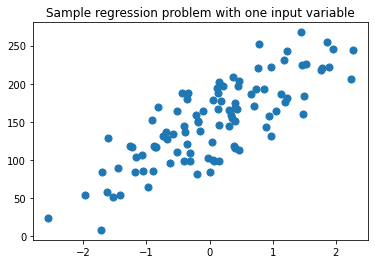

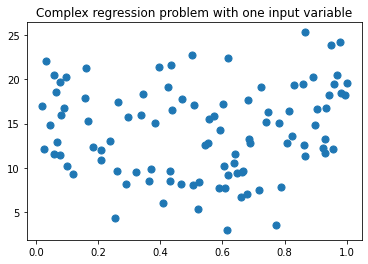

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

## Linear models for regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state = 0)
linreg = LinearRegression().fit(X_train,y_train)
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))#prediction
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))# % prediction

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


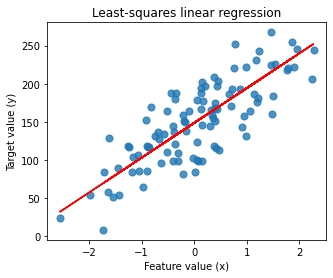

In [19]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

## K-Nearest Neighbors Regression

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state = 0)
knnreg =KNeighborsRegressor(n_neighbors = 5).fit(X_train,y_train)
print(knnreg.predict(X_test))
print('R-squared train score: {:.3f}' .format(knnreg.score(X_train, y_train)))
print('R-squared test score: {:.3f}' .format(knnreg.score(X_test, y_test))) #R-square high = เกาะเส้น 

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-squared train score: 0.745
R-squared test score: 0.425


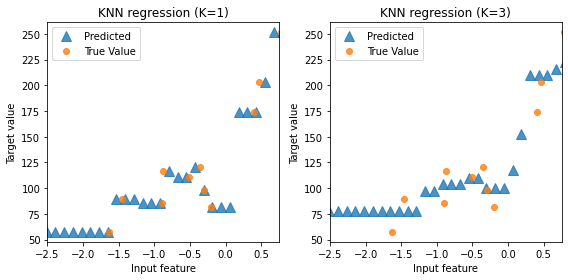

In [23]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Ridge regression

In [27]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
linridge = Ridge(alpha = 20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))# สปส ไม่เป็น 0

ridge regression linear model intercept: 148.48609932907925
ridge regression linear model coeff:
[36.26506226]
R-squared score (training): 0.650
R-squared score (test): 0.545
Number of non-zero features: 1


#### Ridge regression with feature normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

linridge = Ridge(alpha = 20.0).fit(X_train_scaled , y_train)




print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 132.076872087215
ridge regression linear model coeff:
[31.23837752]
R-squared score (training): 0.179
R-squared score (test): 0.196
Number of non-zero features: 1


#### Ridge regression with regularization parameter: alpha

In [30]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 1, r-squared training: 0.68, r-squared test: 0.21

Alpha = 1.00
num abs(coeff) > 1.0: 1, r-squared training: 0.64, r-squared test: 0.42

Alpha = 10.00
num abs(coeff) > 1.0: 1, r-squared training: 0.30, r-squared test: 0.32

Alpha = 20.00
num abs(coeff) > 1.0: 1, r-squared training: 0.18, r-squared test: 0.20

Alpha = 50.00
num abs(coeff) > 1.0: 1, r-squared training: 0.08, r-squared test: 0.08

Alpha = 100.00
num abs(coeff) > 1.0: 1, r-squared training: 0.04, r-squared test: 0.04

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.00, r-squared test: -0.01



### Lasso regression

In [32]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

linlasso = Lasso(alpha=1.0,max_iter =10000).fit(X_train_scaled,y_train)




print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_R1), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 43.79537233510321
lasso regression linear model coeff:
[197.728591]
Non-zero features: 1
R-squared score (training): 0.671
R-squared score (test): 0.320

Features with non-zero weight (sorted by absolute magnitude):
	[-0.35955316], 197.729


#### Lasso regression with regularization parameter: alpha

In [ ]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

### Polynomial regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)

# 1.
linreg = LinearRegression().fit(X_train,y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)

#2.
linreg = LinearRegression().fit(X_train,y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)

#3. 
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared 

high score  R-squared score is poly deg 2 + ridge